# Aniruddha Halder
# 2017331087

# Line Coding simulation code is given below


In [16]:

import matplotlib.pyplot as plt

def unipolar(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    return inp1
    

def polar_nrz_l(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    inp1=[-1 if i==0 else 1 for i in inp1]
    return inp1



def polar_rz(inp):
    inp1=list(inp)
    inp1=[-1 if i==0 else 1 for i in inp1]
    li=[]
    for i in range(len(inp1)):
        li.append(inp1[i])
        li.append(0)
    return li
    



def Differential_manchester(inp):
    inp1=list(inp)
    li,lock,pre=[],False,''
    for i in range(len(inp1)):
        if inp1[i]==0 and not lock:
            li.append(-1)
            li.append(-1)
            li.append(1)
            lock=True
            pre='S'
        elif inp1[i]==1 and not lock :
            li.append(1)
            li.append(1)
            li.append(-1)
            lock=True
            pre='Z'
        else:
            if inp1[i]==0:
                if pre=='S':
                    li.append(-1);li.append(1)
                else:
                    li.append(1);li.append(-1)
            else:
                if pre=='Z':
                    pre='S'
                    li.append(-1);li.append(1)
                else:
                    pre='Z'
                    li.append(1);li.append(-1)
                         
    return li                        




    




In [17]:
def plot(li):
    plt.subplot(7,1,1)
    plt.ylabel("Unipolar-NRZ")
    plt.plot(unipolar(li),color='red',drawstyle='steps-pre',marker='>')
    plt.subplot(7,1,3)
    plt.ylabel("P-NRZ-L")
    plt.plot(polar_nrz_l(li),color='blue',drawstyle='steps-pre',marker='>')
  
    plt.plot(polar_nrz_i(li),color='green',drawstyle='steps-pre',marker='>')
    plt.subplot(7,1,5)
    plt.ylabel("Polar-RZ")
    plt.plot(polar_rz(li),color='red',drawstyle='steps-pre',marker='>')
    plt.subplot(7,1,5)
   
    plt.ylabel("Dif_Man")
    plt.plot(Differential_manchester(li),color='red',drawstyle='steps-pre',marker='>')
    plt.subplot(7,1,7)

Enter the size of Encoded Data : 
3
Enter the binary bits sequnce of length  3  bits : 

100
100
100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


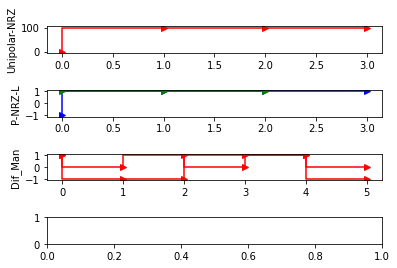

In [19]:
print("Enter the size of Encoded Data : ")
size=int(input())
li=[]
print('Enter the binary bits sequnce of length ',size,' bits : \n')
for i in range(size):
  li.append(int(input()))
plot(li) 

# Block coding section


In [22]:

'''
This part has taken from a github repo.Because this part seemed too hrd for me. :)

'''



import numpy as np
mB = 4
nB = 5
block_coding_mapping_codes = {
# encoding map
"0000": "11110",
"0001": "01001",
"0010": "10100",
"0011": "10101",
"0100": "01010",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "10010",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
# decoding map
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",

}

def get_Mapping_Codes(bits):
  return block_coding_mapping_codes["".join(map(str, bits))]
  
'''
bits = sequence of bits to encoded using mB/nB
'''
def get_MB_NB_Encoding(bits, mB, nB):
  # If the length of bits is not multiple of mB, appends extra 0's at the end of the bits(optional)
  if len(bits) % mB != 0:
    # Necessary bit count to make it multiple of mB
    extra_len = (((len(bits)// mB) + 1) * mB) - len(bits)
    extra = np.array(np.zeros(extra_len), dtype=int)
    bits = np.append(bits, extra)
  
  encoded_bits_str = ""
  for i in range(0, len(bits), mB):
    encoded_bits_str += get_Mapping_Codes(bits[i:i+mB])
  
  # Convert the encoded bit string to list of bits
  encoded_bits_list = list(encoded_bits_str)
  encoded_bits_map = map(int, encoded_bits_list)
  encoded_bits = np.array(list(encoded_bits_map))
  return encoded_bits

'''
bits = sequence of bits to decoded using mB/nB
'''
def get_NB_MB_Decoding(bits, mB, nB):
  if len(bits) % nB != 0:
    print("Invalid length, Decoding Not possible!")
    return
  decoded_bits_str = ""
  for i in range(0, len(bits), nB):
    decoded_bits_str += get_Mapping_Codes(bits[i:i+nB])
  # Convert the decoded bit string to list of bits
  decoded_bits_list = list(decoded_bits_str)
  decoded_bits_map = map(int, decoded_bits_list)
  decoded_bits = np.array(list(decoded_bits_map))
  return decoded_bits

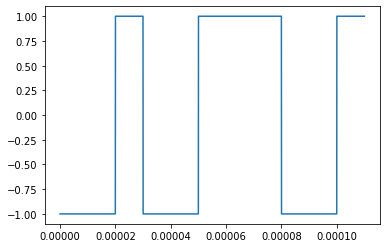

<Figure size 1800x360 with 0 Axes>

In [23]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int) 
#bits = get_MB_NB_Encoding(bits, mB, nB)
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.plot(t, x)
plt.figure(figsize = (25,5))
plt.show()
